# **The Best Neighborhood in Pittsburgh based on Community**

**Group members:**
- Makenzie Wolf - Grow Pittsburgh Food Gardens
- Jeremy Matloub - Lots to Love
- Ana Polynice - Community Center Attendance

### Our metrics:

Our overarching metric for the best neighborhood in Pittsburgh is it's community. We each chose a metric to analyze that adds to the community: the number of Grow Pittsburgh Gardens in a neighborhood, the number of Lots to Love locations in a neighborhood, the amount of attendance a neighborhood's community centers get, and the number of city facilities in a neighborhood.
If we can find the top eight neighborhoods for each category, we will likely find a neighborhood that overlaps in all aspects, therefore that neighborhood should have the best community.

## Grow Pittsburgh Food Gardens:

Grow Pittsburgh is an organization that educates those who live in the city of Pittsburgh on how to care for and grow food despite living in an urban setting. They organize adult workshops, garden curriculum for schools and teacher training in order to teach others and donate the produce they grow to food distribution centers. This allows people to not only gain knowledge on how to grow their own food but help their community by providing safe and locally grown produce to those who may not have access to it.

**Dataset link:**
https://data.wprdc.org/dataset/grow-pittsburgh-food-gardens\

### How this relates to the metric of community?
The more of these gardens there are in a neighborhood, the more likely you will be surrounded by those who cared about you, hence strengthening the community.

**Let's get to the data!**

In [2]:
## import the important stuffs!
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import fpsnippets

plt.style.use("seaborn-pastel")
gards = pd.read_csv("Datasets/growpittsburgh.csv")
gards.head(10)

,_id,urban_grower,grower_id,category,url,street_address,city,state,zip_code,country,latitude,longitude
0,1,Angora Gardens,584,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,3 Muse Lane,White Oak,Pennsylvania,15131.0,US,40.404686,-79.862095
1,2,Everybody's Garden,586,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,301 West Elizabeth Street,Pittsburgh,Pennsylvania,15207.0,US,40.406546,-79.945442
2,3,EvGard Extension,587,other,https://www.growpittsburgh.org/directory/garde...,NaN,Pittsburgh,Pennsylvania,15201.0,US,40.406377,-79.945559
3,4,Glen Hazel Communiuty Garden,588,other,https://www.growpittsburgh.org/directory/garde...,Johnston Avenue at Roselle Drive,Pittsburgh,Pennsylvania,15207.0,US,40.406040,-79.931253
4,5,Grow Pittsburgh,589,grow-pittsburgh-site,https://www.growpittsburgh.org/directory/garde...,6587 Hamilton Avenue #2W,Pittsburgh,Pennsylvania,15206.0,US,40.458481,-79.911381
5,6,Lawrenceville Organic Community Garden,590,other,https://www.growpittsburgh.org/directory/garde...,"Allegheny Cemetery, 4734 Butler Street",Pittsburgh,Pennsylvania,15201.0,US,40.477158,-79.956114
6,7,Masjid al Mu'min Madinah Garden,591,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,159 Winslow Street,Pittsburgh,Pennsylvania,15206.0,US,40.464450,-79.911651
7,8,South Oakland Community Orchard,592,other,https://www.growpittsburgh.org/directory/garde...,3213 Parkview Avenue,Pittsburgh,Pennsylvania,15213.0,US,40.429834,-79.953578
8,9,Thelma Lovette YMCA Garden,593,other,https://www.growpittsburgh.org/directory/garde...,2114 Centre Avenue,Pittsburgh,Pennsylvania,15219.0,US,40.444369,-79.978126
9,10,Wiggins Garden,594,other,https://www.growpittsburgh.org/directory/garde...,Near 3026 Wiggins Street,Pittsburgh,Pennsylvania,15219.0,US,40.457618,-79.969499


This is what the data set looks like at the beginning! As it is not very useful the way it is, we have to use the gardens' latitudes and longitudes to find their neighborhoods and then count the number of times their neighborhoods occur over the dataset.

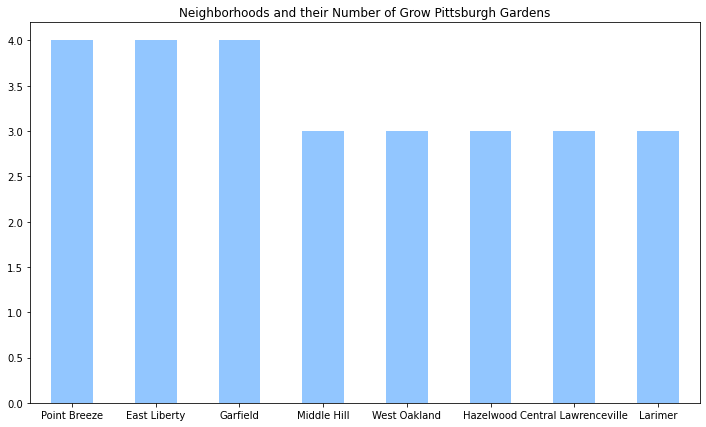

In [3]:
nlist = []
counts = []
for index, row in gards.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    nlist.append(fpsnippets.geo_to_neighborhood(lat, lon))

latlongraph = pd.DataFrame(nlist, columns = ["neighborhood"])
neighbors = latlongraph["neighborhood"].value_counts().head(8)
neighbors.plot(kind = "bar", rot = 0, x = "neighborhood", y = "number of gardens", title = "Neighborhoods and their Number of Grow Pittsburgh Gardens", figsize = (12, 7))


### **Results:**
For the gardens metric, it seems as though the top 8 are, in ascending order: Larimer (3), Central Lawrenceville (3), Hazelwood (3), West Oakland (3), Middle Hill (3), Garfield (4), East Liberty (4), Point Breeze (4). The top three neighborhoods have all tied with the same number of gardens overall.

## Lots to Love: ##

Lots to Love is a guide for community organizations and residents who are interested in transforming vacant lots into well-loved spaces. This includes community parks, gardens, animal habitats, and more.

### How this relates to the metric of community?
The more of these community oriented restoration projects there are in a neighborhood, the more likely you will be to have free and accessible public spaces, strengthening community and interpersonal relationships.

**Let's get to the data!**

In [4]:
import pandas as pd
file = pd.read_csv("Datasets/lotstolove.csv")
file

,_id,entry_id,object_id,name,description,type,project_stage,year_implemented,partners,idea_description,...,need_materials,need_volunteers_2,need_funding_2,need_materials_2,need_tools2,address,location,municipality,latitude,longitude
0,1,54f096d1d8030a0300bef793,0050M00157000000,Kincaid Street Community Garden,Kincaid Street Community Garden was started as...,Food-Garden,A-project-that-has-been-implemented-,2011,"GCAT, PULSE, Assemble",NaN,...,f,f,f,f,f,Unknown Location,Pgh---East-End,NaN,40.465980,-79.934908
1,2,54f096d3d8030a0300bef795,0050M00167000000,Kincaid Street Community Garden,Kincaid Street Community Garden was started as...,Food-Garden,A-project-that-has-been-implemented-,2011,"GCAT, PULSE, Assemble",NaN,...,f,f,f,f,f,5409 KINCAID ST PITTSBURGH,Pgh---East-End,NaN,40.466375,-79.934859
2,3,54f096d3d8030a0300bef797,0050M00158000000,Kincaid Street Community Garden,Kincaid Street Community Garden was started as...,Food-Garden,A-project-that-has-been-implemented-,2011,"GCAT, PULSE, Assemble",NaN,...,f,f,f,f,f,Unknown Location,Pgh---East-End,NaN,40.465990,-79.934984
3,4,54f096d4bfdf8a0300494259,0050M00169000000,Kincaid Street Community Garden,Kincaid Street Community Garden was started as...,Food-Garden,A-project-that-has-been-implemented-,2011,"GCAT, PULSE, Assemble",NaN,...,f,f,f,f,f,Unknown Location,Pgh---East-End,NaN,40.466373,-79.934726
4,5,5522f6371051330300e07890,0382A00112000000,NaN,NaN,NaN,An-idea-for-a-lot,NaN,NaN,Ambassador: Julie ReClaim McKeesport is a prog...,...,t,f,f,f,f,Unknown Location,NaN,NaN,40.344805,-79.865123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,589b2fd72c7d62040021625f,0124J00350000000,NaN,NaN,NaN,An-idea-for-a-lot,NaN,NaN,NaN,...,f,f,f,f,f,554 LARIMER AVE PITTSBURGH,NaN,NaN,40.465836,-79.912412
288,289,589b2f9c16c5790400bbb447,0125F00077000000,NaN,NaN,NaN,A-project-that-is-in-progress-,NaN,NaN,NaN,...,f,f,f,f,f,129 TORRENS ST PITTSBURGH,NaN,NaN,40.458416,-79.910976
289,290,58f0f9243a6893040098844f,0125L00370000000,NaN,NaN,NaN,An-idea-for-a-lot,NaN,NaN,I'd love to make this space into a dog park or...,...,t,f,f,f,f,6800 SIMONTON ST PITTSBURGH,NaN,NaN,40.455359,-79.907671
290,291,5a04961ffc700b0400d36025,5a04961ffc700b0400d36024,North Avenue Pollination Garden & Bird Habitat,Pollination Garden & Bird Habitat,Flower-Garden,A-project-that-has-been-implemented-,2017,"Impact Redevelopment, Wilkinsburg Youth Projec...",NaN,...,f,f,f,f,f,Near 718 North Ave,Municipality,Wilkinsburg,40.444746,-79.883056


<br>
This is what the data set looks like intitially! As it is not very useful the way it is, we have to use the individual project latitudes and longitudes to identify their neighborhoods and then total the number of times each neighborhood occurs throughout the dataset.
<br>
<br>


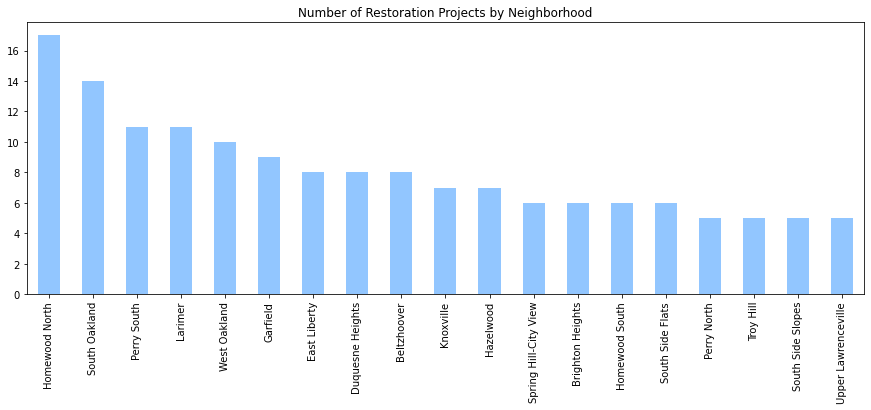

In [5]:
file = pd.read_csv("Datasets/lotstolove.csv")
file = file.sort_values(by=["entry_id"], ascending=True)

data = []

for index, row in file.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    data.append(fpsnippets.geo_to_neighborhood(lat, lon))

latlongraph = pd.DataFrame(data, columns = ["neighborhood"])
graph = latlongraph["neighborhood"].value_counts().head(19)
graph.plot(kind = "bar", title = "Number of Restoration Projects by Neighborhood", figsize = (15, 5))



### **Top Neighborhoods by Project Quantity** ###

1. Homewood North - 17
2. South Oakland - 14
3. Perry South - 11
4. Larimer - 11
5. West Oakland - 10
6. Garfield - 9
7. East Liberty - 8
Duquesne Heights - 8

### **Reflection** ##
By a notable margin, Homewood North has a significantly higher quality of community-based restoration projects, said project centered around turning vacant lots into accessible spaces aimed toward community betterment. Being a suburban area with a high density of smaller sized community parks, the neighborhood provides accessible green spaces to a wideranging demographic. South Oakland, being more personally familiar with with the neighborhood, has significantly larger parks, such as Schenley Park, and a variety of other smaller green spacesmaking it a secondary contender. My personal favorite and initial prediction for the top neighborhood would have been East Liberty, having been there several times and seen the expansive parks, playgrounds, and green public spaces in the neighborhood with a strong semblance of community. Notably, I once saw a Zumba class take place in a park adjacent to a local weekly farmers market, that has since closed for the winter. 

## Community Space Distribution and Attendance

### Introduction
In an era of less face-to-face interaction with increasing digital connectivity, the sense of community fostered by public spaces and gatherings gradually fades. Community Centers are one avenue of preservation nonetheless -- being public venues for socialization and recreational activity, their active function within a neighborhood can signify a close-knit community. Here, we seek to analyze the distribution of these centers as a metric of community.
### Dataset Used

- [City of Pittsburgh Facilities (WRDOC)](https://data.wprdc.org/dataset/city-of-pittsburgh-facilities/resource/fbb50b02-2879-47cd-abea-ae697ec05170)

Lists a number of public facilities around Pittsburgh.

#### Density of Community Spaces
We will begin by importing pandas and geopandas to analyze the datasets.

With our libraries available for use, we will import our City of Pittsburgh Facilities dataset and name it "facilities". 

In [6]:
facilities = pd.read_csv('Datasets/city-facilities.csv')
facilities.head(3)

,_id,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,650726265,120-J-300,f,57th Street Park Building,f,Storage,Department of Public Works,NaN,57TH ST,...,Upper Lawrenceville,7,10.0,42003101100,2.0,10.0,2.0,3-5,40.485666,-79.946450
1,2,783044037,2-H-284,f,Albert Turk Graham Park Shelter,f,Shelter,Department of Public Works,39.0,VINE ST,...,Crawford-Roberts,6,3.0,42003030500,3.0,3.0,2.0,2-1,40.440458,-79.984104
2,3,1997158435,23-R-157,f,Allegheny Northside Senior Center and Hazlett ...,t,Senior,CitiParks,5.0,ALLEGHENY SQ E,...,Allegheny Center,1,22.0,42003562700,1.0,22.0,1.0,1-6,40.453099,-80.005343


You will note, from a preliminary list of 3 rows, that the data contains a number of columns as well as types of facilities irrelevant to the overarching metric. We would like to sift through the dataset and target recreational spaces instead. To understand what data we work with, we will first extract a list of facilty types to determine how to splice the set.

In [7]:
# List the different possible names for the 'type' column
print(facilities['type'].unique())

['Storage' 'Shelter' 'Senior' 'Pool' 'Utility' 'Activity' 'Restrooms'
 'Service' 'Concession' 'Dugout' 'Pool/Rec' 'Rec Center' 'Office'
 'Pool Closed' 'Firehouse' 'Community' 'Vacant' 'Cabin' 'Medic Station'
 'Training' 'Police' 'Salt Dome' 'Recycling' 'SERVICE' 'STORAGE' 'POLICE'
 'TRAINING' 'OFFICE']



We can now see what types of facilities the dataset has provided us! To determine the density of community spaces, we will extract data entries deemed types 'Pool', 'Pool/Rec', 'Rec Center', 'Dugout', 'Senior', 'Shelter', and 'Community' to their own dataframe. To do this, we will create a query mask of our terms and apply them to our existing data. 

Note that while deciding which types of public facilities foster community bonds is subjective, they were decided upon based off of the intended function of each structure.


In [8]:
spaces = ['Pool', 'Pool/Rec', 'Rec Center', 'Community', 'Senior', 'Shelter', 'Dugout']
typemask = facilities['type'].isin(spaces)
filtered = facilities[typemask]
filtered.sample(3)

,_id,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
216,217,1883573076,005-S-097,f,Mount Washington Shelter House,f,Shelter,CitiParks,529.0,NORTON ST,...,Mount Washington,2,19.0,42003191400,5.0,19.0,3.0,4-27,40.424654,-80.013415
143,144,130294472,82-H-1-0-2,f,Highland Park Lake Point Shelter,f,Shelter,Department of Public Works,7206.0,LAKE DR,...,Highland Park,7,11.0,42003980100,2.0,11.0,5.0,3-9,40.480222,-79.909760
44,45,536715455,55-E-220,f,Bud Hammer Field Third Base Shelter,f,Shelter,Department of Public Works,NaN,TASSO ST,...,Hazelwood,5,15.0,42003562900,3.0,15.0,4.0,2-12,40.420598,-79.946277


This query mask has allowed us to create a filtered dataframe of community spaces. Still, to tidy up the data even further, let's form an entirely new frame with only the data we need -- we will include the name of the community space as well as its type and coordinates while dropping the other columns entirely.

In [9]:
facil = pd.DataFrame(columns = ['Name', 'Type', 'Latitude', 'Longitude'])
facil['Name'] = filtered['name']
facil['Type'] = filtered['type']
facil['Latitude'] = filtered['latitude']
facil['Longitude'] = filtered['longitude']

print(len(facil))
facil.head(10)


161


,Name,Type,Latitude,Longitude
1,Albert Turk Graham Park Shelter,Shelter,40.440458,-79.984104
2,Allegheny Northside Senior Center and Hazlett ...,Senior,40.453099,-80.005343
3,Ammon Recreation Center,Pool,40.448735,-79.977856
6,Arlington Pool Restrooms,Pool,40.417753,-79.974688
14,Banksville Deck Hockey Benches,Dugout,40.414327,-80.038920
15,Banksville Park Gazebo,Shelter,40.414653,-80.039286
16,Banksville Pool Building and Shelter,Pool,40.414784,-80.040176
17,Beechview Senior and Community Center,Senior,40.410741,-80.024363
18,Bloomfield Deck Hockey Benches,Dugout,40.462618,-79.953666
19,Bloomfield Pool and Recreation Center,Pool/Rec,40.462133,-79.953589


This is a much cleaner sample! We will now seek to determine the distribution of these 161 facilities to see which neighborhoods contain more spaces. We will assign each coordinate to a neighborhood and tally up our numbers through a graph.

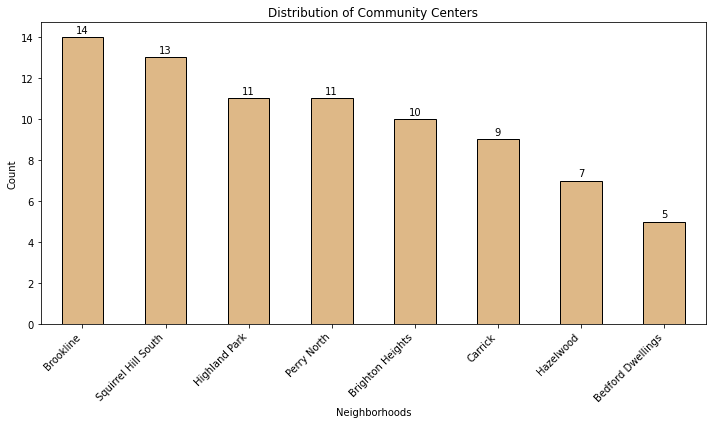

In [10]:
nlist = []
counts = []
for index, row in facil.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    nlist.append(fpsnippets.geo_to_neighborhood(lat, lon))

distribution = pd.DataFrame(nlist, columns = ["neighborhood"])
neighbors = distribution["neighborhood"].value_counts().head(8)

plt.figure(figsize=(10, 6))
neighbors.plot(kind='bar', color='burlywood', edgecolor='black')

plt.title('Distribution of Community Centers')
plt.xlabel('Neighborhoods')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

for i, value in enumerate(neighbors):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


From the data represented, it appears as though Brookline leads in its number of community spaces with 14. 

For this metric:
##### 1) Brookline
##### 2) Squirrel Hill South
##### 3) Highland Park
##### 4) Perry North
##### 5) Brighton Heights

### Reflection
By splicing our dataframe of all public facilities in Pittsburgh to contain only community spaces, we were able to easily extract coordinates from our entries to assign them to neighborhoods. While Brookline, Squirrel Hill, and Highland Park take the lead in their density of facilities, it is important to note that the presence of a facility only provides an opportunity for physical interaction. It is up to residents to involve themselves in what their neighborhoods have to offer! Further nuanced study could involve walkability, attendance rates, and more to further analyze how different factors contribute to whether or not pepo 